In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
print(city.head())
print(ride.head())
city_ride = ride.merge(city,on = 'city',how = 'left')
# Display the data table for preview
city_ride.head()

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [21]:
group_ride = city_ride.groupby('city').agg({'fare':'mean','ride_id':'count','driver_count':'max'}).rename(columns = {'fare': 
                                                        'avg_fare','ride_id':'num_rides',
                                                        'driver_count':'total_driver'})
#group_city = pd.DataFrame(city.groupby('city')['driver_count'].sum())
#group_new = pd.merge(group_city,group_ride,on = 'city', how = 'outer').rename(columns = {'fare': 
#                                                        'avg_fare','ride_id':'num_rides',
 #                                                       'driver_count':'total_driver'})
group_ride.head()

,avg_fare,num_rides,total_driver
city,,,
Amandaburgh,24.641667,18,12
Barajasview,25.332273,22,26
Barronchester,36.422500,16,11
Bethanyland,32.956111,18,22
Bradshawfurt,40.064000,10,7


In [19]:
# analysis = city_ride.groupby('city').agg({'fare':'mean','driver_count':'sum'
#                                          ,'ride_id':'count','type':'first'
#                                          }).rename(columns = {'fare':'avg_fare',
#                                                                                   'driver_count':'total_driver',
#                                                                                'ride_id':'num_rides'})
# urban = analysis.loc[analysis['type'] == 'Urban',:]
# suburban = analysis.loc[analysis['type'] == 'Suburban',:]
# rural = analysis.loc[analysis['type'] == 'Rural',:]
# plt.scatter(urban['num_rides'],urban['avg_fare']
#             ,s = urban['total_driver'],facecolor = 'red',
#                 edgecolor = 'black',alpha = 0.5)
# plt.scatter(suburban['num_rides'],suburban['avg_fare']
#             ,s = suburban['total_driver']/3,facecolor = 'blue',
#                 edgecolor = 'black',alpha = 0.5)
# plt.scatter(rural['num_rides'],rural['avg_fare']
#             ,s = rural['total_driver']/3,facecolor = 'orange',
#                 edgecolor = 'black',alpha = 0.5)
# plt.legend()

In [20]:
# test1 = pd.merge(group_new,city,on = 'city',how = 'outer')
# print(test1.head())
# test1 = test1[['city','total_driver','avg_fare','num_rides','type']]
# plt.scatter(test1['num_rides'],test1['avg_fare']
#             ,s = test1['total_driver']*10,#c = test['type'],
#                 edgecolor = 'black',alpha = 0.5)

# #print(test['type'])

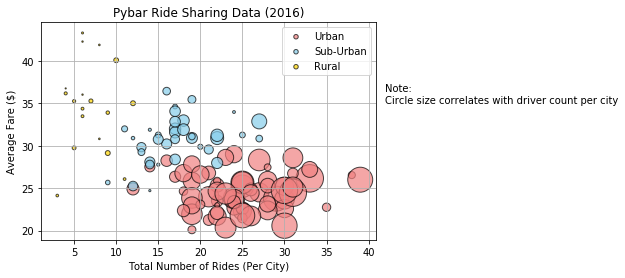

In [18]:
# Obtain the x and y coordinates for each of the three city types
analysis = city_ride.groupby('city').agg({'fare':'mean','driver_count':'sum'
                                         ,'ride_id':'count','type':'first'
                                         }).rename(columns = {'fare':'avg_fare',
                                                                                  'driver_count':'total_driver',
                                                                               'ride_id':'num_rides'})


# Build the scatter plots for each city types
colors = {'Urban':'lightcoral','Suburban':'skyblue','Rural':'gold'}
# Incorporate the other graph properties
plt.figure()
legend_labels = ['Urban','Sub-Urban','Rural']
counter = 0
for subtype in analysis['type'].unique():
    subanalysis = analysis.loc[analysis['type'] == subtype,:]
    plt.scatter(subanalysis['num_rides'],subanalysis['avg_fare']
            ,s = subanalysis['total_driver']/3,facecolor = subanalysis['type'].apply(lambda x: colors[x]),
                edgecolor = 'black',alpha = 0.7, label = legend_labels[counter])
    counter +=1
# Create a legend
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (\$)")
plt.title("Pybar Ride Sharing Data (2016)")
plt.grid()
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]


plt.text(42,35,"Note: \nCircle size correlates with driver count per city",fontsize=10)
# Incorporate a text label regarding circle sizeb

# Save Figure
plt.savefig("./output/Pybar Ride Sharing.jpg")

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

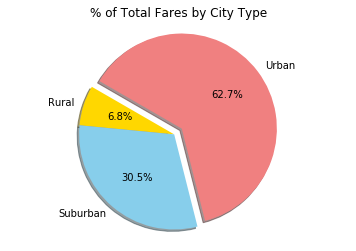

In [7]:
# Calculate Type Percents
total_fare = city_ride.groupby('type')['fare'].sum()
offset = (0,0,0.1)
plt.figure()
plt.pie(total_fare,explode = offset,autopct = "%1.1f%%",colors = ['gold','skyblue','lightcoral'],
        labels = total_fare.index,shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Build Pie Chart
plt.axis('equal')

# Save Figure
plt.savefig("./output/pct_fares_by_city_type.png")

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

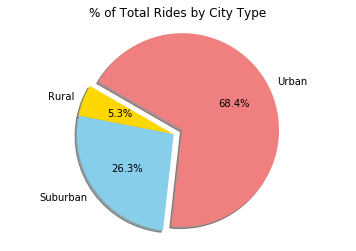

In [9]:
# Calculate Ride Percents
total_rides = city_ride.groupby('type')['ride_id'].count()
# Build Pie Chart
plt.pie(total_rides,explode= (0,0,0.1), autopct= '%1.1f%%',colors = ['gold','skyblue','lightcoral'],
        shadow = True,labels = total_fare.index, startangle= 150)
plt.axis('equal')
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("./output/pct_num_rides_by_city_type.png")

In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64
['Urban' 'Suburban' 'Rural']


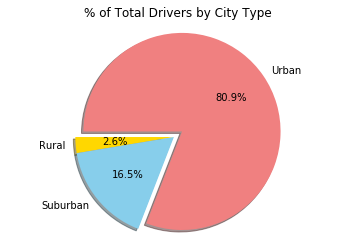

In [11]:
# Calculate Driver Percents
city.head()
driver_by_type = city.groupby('type')['driver_count'].sum()
print(driver_by_type)
print(city.type.unique())
# Build Pie Charts
offset = [0,0,0.1]
plt.pie(driver_by_type,explode= offset,autopct='%1.1f%%',startangle= 180,shadow = True, 
       colors = ['gold','skyblue','lightcoral'],labels = driver_by_type.index)
plt.axis('equal')
plt.title("% of Total Drivers by City Type")
#city_ride# Save Figure
plt.savefig("./output/pct_drivers_by_city_type.png")

In [12]:
# Show Figure
plt.show()